In [1]:
# tabular data
# ducks:
import numpy as np
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# data transformation:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# feature selection:
from sklearn.feature_selection import SelectKBest, RFE, f_regression

In [2]:
from sklearn.linear_model import LinearRegression as linreg

In [3]:
# data acq:
from pydataset import data
# ducks are in row :)

    Load the tips dataset.
        

In [5]:
# to grab that, just get the return of data's function call with the arg of 'tips'
df = data("tips")

In [6]:
print(df.head().to_markdown())
print('=======')
print(df.info())
print('======')
print(df.describe().to_markdown())

|    |   total_bill |   tip | sex    | smoker   | day   | time   |   size |
|---:|-------------:|------:|:-------|:---------|:------|:-------|-------:|
|  1 |        16.99 |  1.01 | Female | No       | Sun   | Dinner |      2 |
|  2 |        10.34 |  1.66 | Male   | No       | Sun   | Dinner |      3 |
|  3 |        21.01 |  3.5  | Male   | No       | Sun   | Dinner |      3 |
|  4 |        23.68 |  3.31 | Male   | No       | Sun   | Dinner |      2 |
|  5 |        24.59 |  3.61 | Female | No       | Sun   | Dinner |      4 |
<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int

        Create a column named price_per_person. This should be the total bill divided by the party size.

In [7]:
# smol prob: size is a property of df:
# this is a different single value than the whole series that we want
df.size

1708

In [ ]:
# using bracket notation will work around that

In [10]:
# if we wanted to just rename it: df = df.rename(columns={'size': 'size_of_party'})

In [11]:
# total bill / party size
df['price_per_person'] = df.total_bill / df['size']

In [12]:
# split that data!
train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349)
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349)
train.shape, validate.shape, test.shape

((136, 8), (59, 8), (49, 8))

In [14]:
# planning outline:
# I want to predict for the tip value of a party based on other features
# If I want to define my X, thats anything potentially besides y, my target
train.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
52,10.29,2.60,Female,No,Sun,Dinner,2,5.145
47,22.23,5.00,Male,No,Sun,Dinner,2,11.115
108,25.21,4.29,Male,Yes,Sat,Dinner,2,12.605
87,13.03,2.00,Male,No,Thur,Lunch,2,6.515
59,11.24,1.76,Male,Yes,Sat,Dinner,2,5.620


In [15]:
X_train, y_train = train.drop(columns='tip'), train[['tip']]

        
        Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

In [20]:
# i could check data types directly with pandas dtype:
X_train['total_bill'].dtype in ('int64', 'float64')


True

In [24]:
# direct comparison with object types
X_train['time'].dtype != 'object'

False

In [32]:
# separate into categorical and continuous values of columns of our data:
# np.issubdtype is a good option for catching anything that numpy considers a number-type thing
# initialize two empty lists
num_cols, cat_cols = [], []
# for every i in X_train's columns:
for i in X_train.columns:
    # If that thing (inside that series) is a number
    if np.issubdtype(X_train[i], np.number):
        #and if it has over 5 elements
        if X_train[i].value_counts().shape[0] > 5:
            #then we'll put that column name in an appropriate list
            num_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        #otherwise its probably an object
        cat_cols.append(i)

In [33]:
num_cols

['total_bill', 'price_per_person']

In [34]:
cat_cols

['sex', 'smoker', 'day', 'time', 'size']

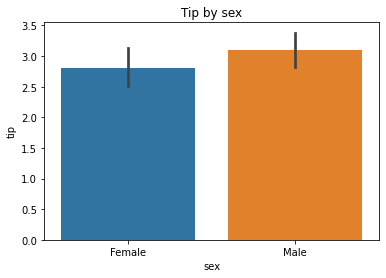

~~~~~~~~~~~~~~~~~~~


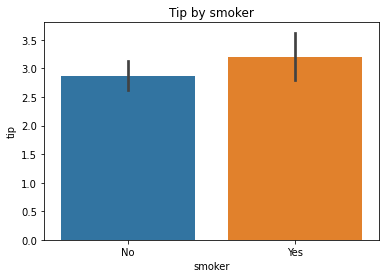

~~~~~~~~~~~~~~~~~~~


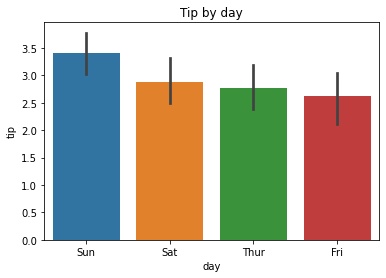

~~~~~~~~~~~~~~~~~~~


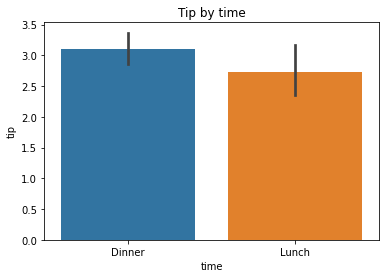

~~~~~~~~~~~~~~~~~~~


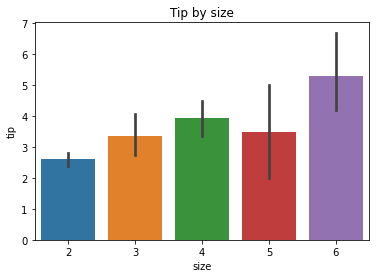

~~~~~~~~~~~~~~~~~~~


In [35]:
# let's do some plots with the continuous target Tip vs the categorical features:
# y: train[tip]
# x: train[anything else]
# for every element/column name i inside of cat_cols:
for i in cat_cols:
    sns.barplot(data=train, x=i, y='tip')
    plt.title(f'Tip by {i}')
    plt.show()
    print('~~~~~~~~~~~~~~~~~~~')

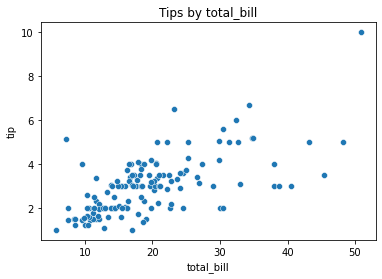

~~~~~~~~~~


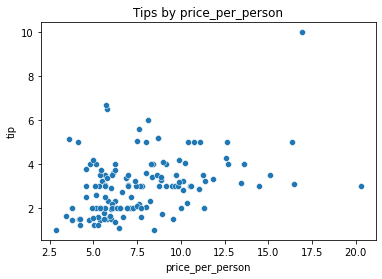

~~~~~~~~~~


In [36]:
# for continuous features:
for i in num_cols:
    sns.scatterplot(data=train, x=i, y='tip')
    plt.title(f'Tips by {i}')
    plt.show()
    print('~~~~~~~~~~')

In [37]:
# need more ducks
from scipy.stats import pearsonr, ttest_ind

In [38]:
# let's make a couple quick tests:
# H0: There is no linear correlation between total bill and
# tip value
# Ha:There is a linear relationship between total bill and tip value
# CL, alpha: 95, 0.05
r, p = pearsonr(train['total_bill'], train['tip'])
if p < 0.05:
    print(f'we can reject our null hypothesis! p is {p} and r is {r}')

we can reject our null hypothesis! p is 8.610316264425765e-18 and r is 0.6516482795249923


In [44]:
# let's check out the weekend values
# subset: weekend tippers vs weekday tippers
weekenders = train[train['day'].str.startswith('S')]
weedayers = train[~train['day'].str.startswith('S')]

In [ ]:
# h0: there is no mean difference in the tip values
# between weekend diners and weekday diners
# Ha: there is a difference in the means of tippers 
# that dine on weekdays vs weekends

In [45]:
t_stat, p = ttest_ind(weekenders['tip'], weedayers['tip'])
if p < 0.05:
        print(f'we can reject our null hypothesis! p is {p} and our t_statistic is {t_stat}')

In [46]:
p

0.09755643351218182

In [48]:
# scaling!
# new column names for scaled cols:
# a string with the colum plus _scaled for every column in num_cols
[f'{i}_scaled' for i in num_cols]

['total_bill_scaled', 'price_per_person_scaled']

In [49]:
X_train[[f'{i}_scaled' for i in num_cols]] = MinMaxScaler(
).fit_transform(X_train[num_cols])

In [50]:
cat_cols.remove('size')

In [51]:
# encoding!
X_train = pd.concat([X_train,pd.get_dummies(X_train[cat_cols], drop_first=True)],
                    axis=1)

In [52]:
X_train.head()

,total_bill,sex,smoker,day,time,size,price_per_person,total_bill_scaled,price_per_person_scaled,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
52,10.29,Female,No,Sun,Dinner,2,5.145,0.100755,0.130460,0,0,0,1,0,0
47,22.23,Male,No,Sun,Dinner,2,11.115,0.365735,0.473563,1,0,0,1,0,0
108,25.21,Male,Yes,Sat,Dinner,2,12.605,0.431869,0.559195,1,1,1,0,0,0
87,13.03,Male,No,Thur,Lunch,2,6.515,0.161562,0.209195,1,0,0,0,1,1
59,11.24,Male,Yes,Sat,Dinner,2,5.620,0.121838,0.157759,1,1,1,0,0,0


In [54]:
X_train.columns.to_list()

['total_bill',
 'sex',
 'smoker',
 'day',
 'time',
 'size',
 'price_per_person',
 'total_bill_scaled',
 'price_per_person_scaled',
 'sex_Male',
 'smoker_Yes',
 'day_Sat',
 'day_Sun',
 'day_Thur',
 'time_Lunch']

In [55]:
modeling_feats = ['total_bill_scaled',
 'price_per_person_scaled',
 'sex_Male',
 'smoker_Yes',
 'day_Sat',
 'day_Sun',
 'day_Thur',
 'time_Lunch']

    Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [56]:
def select_kbest(X, y, k=2):
    '''
    X: dataframe of independent features
    y: single pandas Series (a target)
    k: kwarg, a number of k best features to select
    '''
    # make our kbest object:
    kbest = SelectKBest(f_regression, k=k)
    # fit it from x and y's relationships
    kbest.fit(X, y)
    # get the support values:
    mask = kbest.get_support()
    return X.columns[mask]

In [57]:
# try it out!
select_kbest(X_train[modeling_feats], y_train['tip'])

Index(['total_bill_scaled', 'price_per_person_scaled'], dtype='object')

    Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [58]:
def rfe(X, y, k=2):
    '''
    X: dataframe of independent features
    y: single pandas Series (a target)
    k: kwarg, a number of best recursive features to select
    '''
    # make our rfe object:
    model = linreg()
    rfe_lin = RFE(model, n_features_to_select=k)
    # fit it from x and y's relationships
    rfe_lin.fit(X, y)
    # get the support values:
    mask = rfe_lin.get_support()
    return X.columns[mask]

In [60]:
rfe(X_train[modeling_feats], y_train['tip'])

Index(['total_bill_scaled', 'price_per_person_scaled'], dtype='object')

Use select k best to select the top 2 features for predicting tip amount. What are they?

Use recursive feature elimination to select the top 2 features for tip amount. What are they?

Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

    Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).